In [1]:
import matplotlib.pyplot as plt
from itertools import combinations

#ML4Net - Lab 1

## Team members

Javier González Otero (243078) | Jordi Guillén González (253027) | David Sánchez Maldonado (253798)

## Description

In this lab, you are going to get introduced into Multi-Armed Bandits (MABs) and Wi-Fi simulations. More specifically, you are going to implement a MAB algorithm that performs channel allocation in an Overlapping Basic Service Set (OBSS), i.e., in a scenario where multiple independent BSSs coexist.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 18 May 2025 (EoB).

## Setting up the environment

1. Connect your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the Simulator's source code

In [3]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/Komondor-lightweight.zip

--2025-05-18 18:42:11--  https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/Komondor-lightweight.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/Komondor-lightweight.zip [following]
--2025-05-18 18:42:11--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/Komondor-lightweight.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979661 (957K) [application/zip]
Saving to: ‘Komondor-lightweight.zip’

Komondor-lightweigh 100%[===================>] 956.70K  --.-KB/s    in 0.03s   

3. Define the main path of the code

In [4]:
mypath="/content/drive/Shareddrives/aprendizaje_redes/labs/lab1"

4. Extract the source code

In [5]:
mkdir -p $mypath; cp Komondor-lightweight.zip $mypath; cd $mypath; unzip Komondor-lightweight.zip

Archive:  Komondor-lightweight.zip
replace config_models? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


5. Give permissions to run the code

In [6]:
!cd $mypath/; chmod -R 777 *

6. Compile the code

In [7]:
!cd $mypath/main; ./build_local

## How to run simulations

Komondor can be run by calling its compiled main file ("komondor_main") and indicating the value for different flags.

Next, you will see two different ways of running Komondor, depending on whether MAB Agents are instantiated or not.

In any case, **it is important to know** that:


*   Any input files used by the simulator will be located in the `/input` folder.
*   Any output files generated by the simulator will be located in the `/output` folder.

Apart from that, Komondor generates a set of console logs that give meaningful information.


### 1) Simulations without agents

To simulate specific scenarios (described using "input node" files) **without agents**, one must indicate the following flags:

In [8]:
# DEFINE SIMULATION ARGUMENTS (NO AGENTS)

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test.txt'

# Path of the file where output logs are going to be written
SIMULATION_CODE='AAX-LAB1'

# Flag to indicate whether "NODE LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_NODE_LOGS=1

# Flag to indicate whether "SYSTEM LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_SYSTEM_LOGS=1

# Flag to indicate whether "NODE LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_NODE_LOGS=1

# Total simulated time (in seconds)
SIM_TIME=100

# Value of the random seed that initializes the random number generator
SEED=7

In [ ]:
# RUN THE SIMULATION

!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS DISABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 0
  - script_output_filename: ../output/logs_test.txt
  - simulation_code: AAX-LAB1
  - save_node_logs: 1
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMINISTICALLY through NODES input file...
  - Reading nodes input file '../input/

### 2) Simulations with agents (used for keeping track of temporary performance)

To simulate specific scenarios (described using "input node" files) **with agents**, one must indicate the following flags:

In [9]:
# DEFINE SIMULATION ARGUMENTS (WITH AGENTS FOR MONITORING PERFORMANCE)

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file that describes the agents associated with nodes
INPUT_FILE_AGENTS='../input/agents_monitoring.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test_agents.txt'

# Path of the file where output logs are going to be written
SIMULATION_CODE='AAX-LAB1-AGENTS'

# Flag to indicate whether "NODE LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_NODE_LOGS=0

# Flag to indicate whether "AGENT LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_AGENT_LOGS=0

# Flag to indicate whether "SYSTEM LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_SYSTEM_LOGS=1

# Flag to indicate whether "NODE LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_NODE_LOGS=1

# Flag to indicate whether "AGENT LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_AGENT_LOGS=1

# Total simulated time (in seconds)
SIM_TIME=100

# Value of the random seed that initializes the random number generator
SEED=7

Run the simulation

In [ ]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED

## EXERCISES

### Exercise 1:
Run the simulator (without agents) for the provided input nodes file (`/input/input_nodes.csv`). Before running the simulation, activate the flag that allows saving node logs into a file. After running the simulation, use the information from the log files of each node (e.g., AP_A, STA_A1, AP_B, STA_B1) to plot the scenario. To make the plot, consider the position of the nodes, the channel used, and the power strength that each node perceives from each other node in the deployment.

*Note: To know the power strength perceived by a given device (e.g., AP A) from any other devices (e.g., STA A1, AP B, STA B1), check the logs of that node and identify the cases where other nodes are detected to start/stop a transmission.*

In [10]:
def node_plot(nodes, power_links, names):

  '''
  Plots the nodes placement and the power sensed by each node from each other node.
  Parameters:
  - nodes (list): List that contains the position of each node (each position corresponds with the node number).
  - power_links (list): List that contains lists of the format [tx, rx, power].
  - names (list): List of the names of the nodes.

  Returns:
  - Nothing, it just shows the plot.
  '''
  # Plotting
  plt.figure(figsize=(10, 8))
  for i, (x, y) in enumerate(nodes):
    if i % 2 == 0:
        plt.plot(x, y, 's', markersize=12)
    else:
        plt.plot(x, y, 'o', markersize=12)
    plt.text(x + 0.1, y + 0.1, names[i], fontsize=9)
    plt.text(x + 0.1, y, "Channel used: 0", fontsize=9)

  # Draw arrows for power sensed
  for tx, rx, power in power_links:
    x_start, y_start = nodes[tx]
    x_end, y_end = nodes[rx]
    dx, dy = x_end - x_start, y_end - y_start
    plt.arrow(x_start, y_start, dx, dy, head_width=0.15, length_includes_head=True, color='gray', alpha=0.5)
    # Label with power
    mid_x = x_start + dx * 0.5
    mid_y = y_start + dy * 0.5
    plt.text(mid_x, mid_y, f"{power:.1f} dBm", fontsize=12, color='green')

  plt.xlabel("X Position")
  plt.ylabel("Y Position")
  plt.title("2D Plot of Nodes and Power Sensed")
  plt.grid(True)
  plt.show()


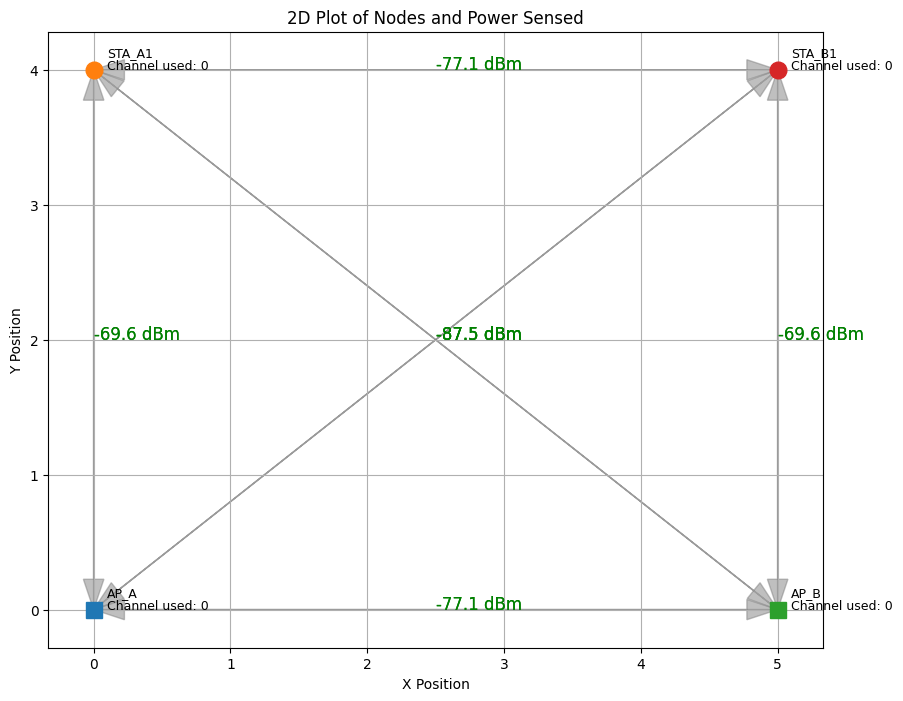

In [ ]:
nodes = [[0.00, 0.00], [0.00, 4.00], [5.00, 0.00], [5.00, 4.00]]
power_links = [[0, 1, -69.646758], [0, 2, -77.108599], [0, 3, -87.466035],
             [1, 0, -69.646758], [1, 2, -87.466035], [1, 3, -77.108599],
             [2, 1, -87.466035], [2, 0, -77.108599], [2, 3, -69.646758],
             [3, 1, -77.108599], [3, 2, -69.646758], [3, 0, -87.466035]]
names = ["AP_A", "STA_A1", "AP_B", "STA_B1"]

node_plot(nodes, power_links, names)

**Explanation**

In this exercise we had to plot all the known information from the nodes of the simulation. To take the information, we activated the FLAG_SAVE_NODE_LOGS argument of the simulator to save the logs of the nodes and analyse them.

To obtain the position we focused of the first part of the logs of each node, where we find the position, node_id, channel used and other information.

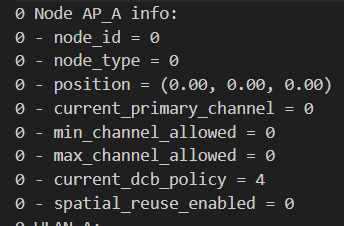

Then, to find the power sensed from each node, we focused on the rest of the logs. We know that there are only 4 possible connections: from AP_A to STA_A, from AP_B to STA_B, from STA_A to AP_A and from STA_B to AP_B. Looking at this connections in each of the logs, we focus on the node that transmits a packet and we took notes of the power sensed by the node of the corresponding logs.

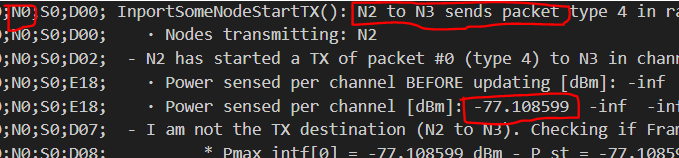

Finally, we took all this information and we plotted it

### Exercise 2:

Run the simulator (this time, with agents in "monitor" mode) for the provided input nodes file (`/input/input_nodes.csv`). The input agents file to be used is provided as (`/input/agents_monitoring.csv`). Ensure that the agent logs are saved into files by setting the corresponding flag to 1. After running the simulation, use the agent log files to plot the temporary throughput obtained by each AP.

In [11]:
def parse_agent_logs(logs_path, logs):
  '''
  Plots the nodes placement and the power sensed by each node from each other node.
  Parameters:
  - logs_path (String): Path to the folder containing the logs files.
  - logs (list): List that contains the names of the logs files.

  Returns:
  - time_list (list): List that contains the time of each throughput for each agent logs.
  - throughput_list (list): List that contains each throughput for each agent logs.
  '''
  time_list = []
  throughput_list = []
  for i in range (len(logs)):
    log_throughput_list = []
    log_time_list = []
    with open(logs_path + logs[i]) as f:
      for line in f.readlines():
        split = line.split(";")
        if("Average throughput" in split[3]):
          throughput = split[3].split(" ")[-2]
          log_time_list.append(float(split[0]))
          log_throughput_list.append(float(throughput))
    time_list.append(log_time_list)
    throughput_list.append(log_throughput_list)
  return time_list, throughput_list

def plot_throughput(time_list, throughput_list, agents_names):
  '''
  Plots the nodes placement and the power sensed by each node from each other node.
  Parameters:
  - time_list (list): List that contains the time of each throughput for each agent logs.
  - throughput_list (list): List that contains each throughput for each agent logs.
  - agents_names (list): List that contains the names of the agents.

  Returns:
  - Nothing, it just shows the plot.
  '''
  for i in range (len(agents_names)):
    plt.figure(figsize=(12, 5))
    plt.plot(time_list[i],throughput_list[i])
    plt.title(agents_names[i])
    plt.show()

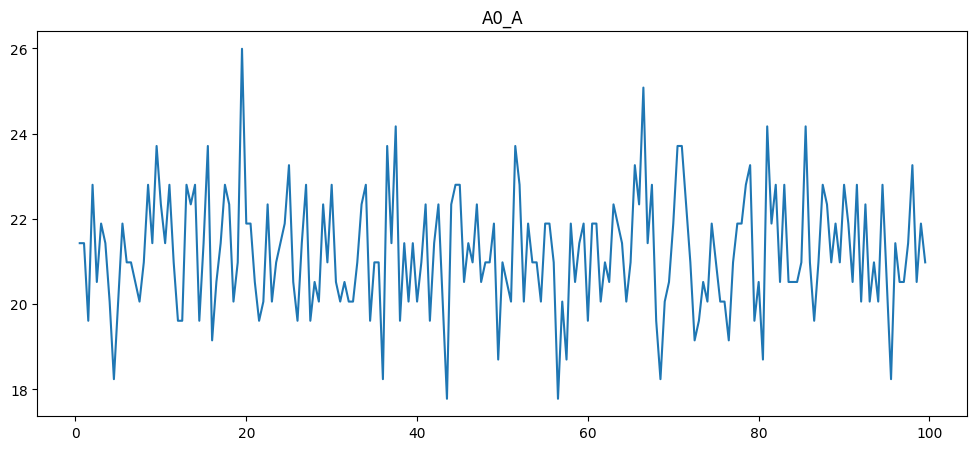

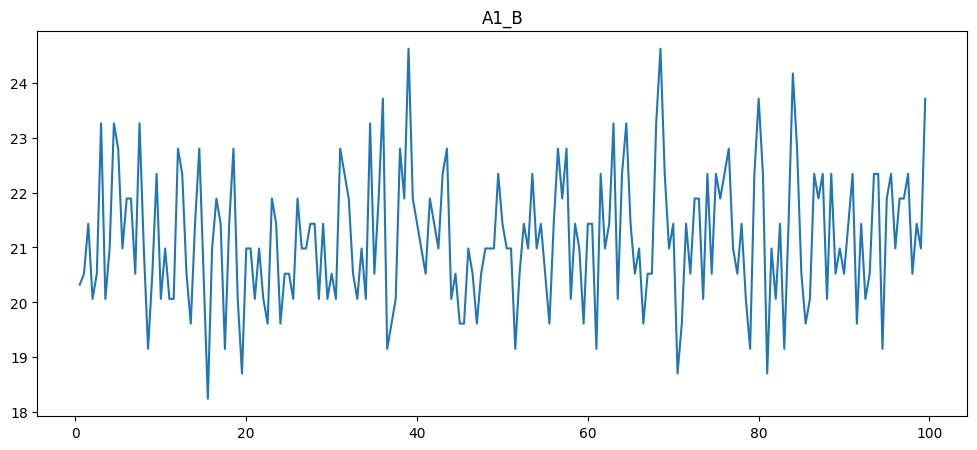

In [ ]:
ruta_shared_drive = "/content/drive/Shareddrives/aprendizaje_redes"
output = "/labs/lab1/output/"
path = ruta_shared_drive + output
archivos = ["logs_output_AAX-LAB1-AGENTS_A0_A.txt","logs_output_AAX-LAB1-AGENTS_A1_B.txt"]
agents = ["A0_A","A1_B"]

time_list, throughput_list = parse_agent_logs(path, archivos)
plot_throughput(time_list, throughput_list, agents)

**Explanation**

In this exercise we had to plot the throughput of the agents of the simulation. To take the information, we activated the FLAG_SAVE_AGENT_LOGS argument of the simulator to save the logs of the agents and analyse them.

To obtain the average throughput of each timestamp of the agent logs, we created a parser (parse_agent_logs) that returns the timestamps and the corresponding throughputs of each agent. This parser reads the logs and gathers the required information:

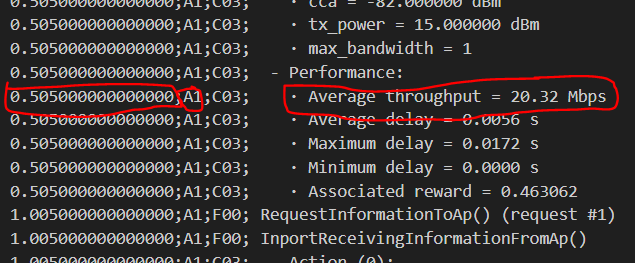

Finally, we plot the information

### Exercise 3:

Copy the `agents_monitoring.csv` file, rename it as `agents_egreedy.csv`, and modify it as follows:
- Indicate the possible "channel actions" by indicating `0,1` in the column 'actions channels' of each agent.
- Set the colum "learning mechanism" to `1`(which stands for multi-armed bandits) for each agent.
- Set the column "selected strategy" to `1` (which stands for ɛ-greedy) for each agent.

Then, run the simulation using `agents_egreedy.csv` and plot the temporary throughput obtained by each AP, as done in Exercise 2. In addition, read the console logs from Komondor and explain the displayed agent logs.

**Important:** In case of experiencing a run-time error, check that the fields in the 'agents' file are separated by a semicolon (`;`).

In [ ]:
INPUT_FILE_AGENTS='../input/agents_egreedy.csv'
FLAG_SAVE_AGENT_LOGS=1
SIMULATION_CODE='AAX-LAB1-AGENTS-EGREEDY'
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED

/bin/bash: line 1: cd: /main: No such file or directory
/bin/bash: line 1: ./komondor_main: No such file or directory


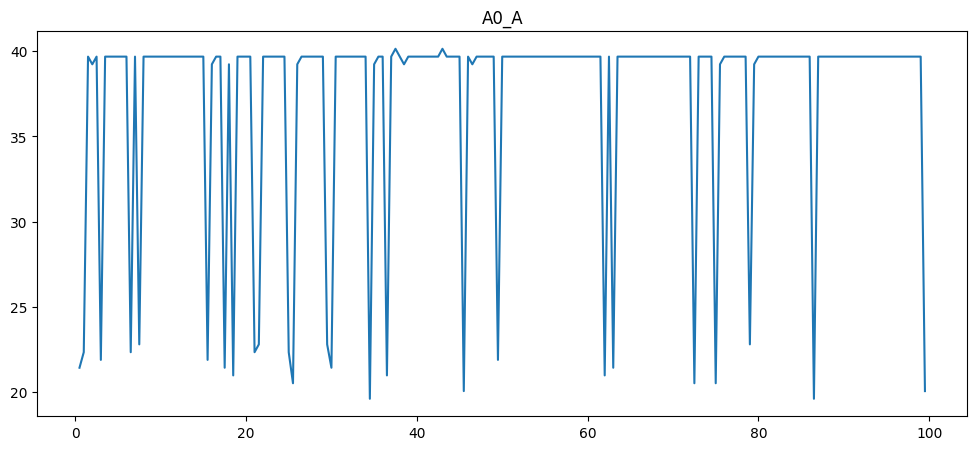

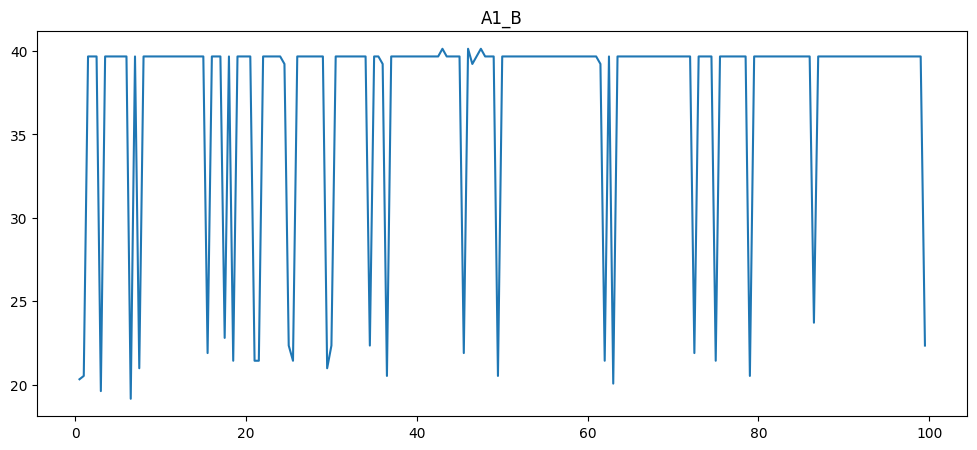

In [ ]:
ruta_shared_drive = "/content/drive/Shareddrives/aprendizaje_redes"
output = "/labs/lab1/output/"
path = ruta_shared_drive + output
archivos = ["logs_output_AAX-LAB1-AGENTS-EGREEDY_A0_A.txt","logs_output_AAX-LAB1-AGENTS-EGREEDY_A1_B.txt"]
agents = ["A0_A","A1_B"]

time_list, throughput_list = parse_agent_logs(path, archivos)
plot_throughput(time_list, throughput_list, agents)

**Explanation**

In this exercise we had to plot the throughput of the agents of the simulation activating the egreedy strategy.

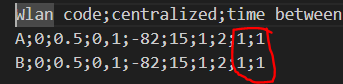

To take the information, we activated the FLAG_SAVE_AGENT_LOGS argument of the simulator to save the logs of the agents and analyse them.

To obtain the average throughput of each timestamp of the agent logs, we created a parser (parse_agent_logs) that returns the timestamps and the corresponding throughputs of each agent. This parser reads the logs and gathers the required information:


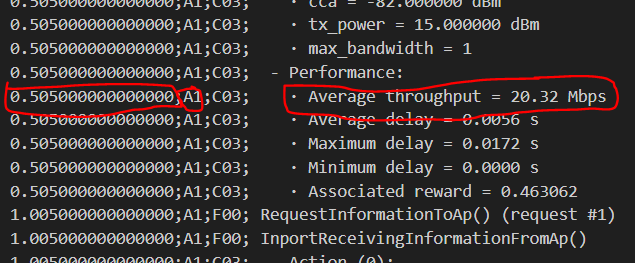

Finally, we plot the information

### Exercise 4:
Create another input agents file (name it `agents_ml4net.csv`), but this time set the column "selected_strategy" (the last one) to 5.

The mechanism (as it is currently implemented) will just select actions randomly. For that reason, you have to define your own action-selection strategy by completing the code in `/learning_modules/network_optimization_methods/multi_armed_bandits.h`. More specifically, you will have to complete the function `PickArmML4Net()`, which contains all the logic. You can get inspiration from the other implemented MAB algorithms (e.g., UCB, Thompson sampling).

**IMPORTANT:** If you modify the source code, you will have to re-compile it (see step 6 in "Setting up the environment") before running new simulations.

In [ ]:
""" CODE IMPLEMENTING THE STRATEGY

int PickArmML4Net(int num_arms, double *average_reward_per_arm, double initial_epsilon, double alpha, int num_iterations, int *available_arms, int *times_arm_has_been_selected) {

    // Compute decayed epsilon for the current iteration
    double epsilon_t = initial_epsilon / (1.0 + alpha * (double)num_iterations);

    // Generate a random number to decide between exploration and exploitation
    double rand_number = ((double) rand() / (double)RAND_MAX);
    int action_ix = -1;

    if (rand_number < epsilon_t) {
        // EXPLORE: choose the available arm that has been selected the least
        int min_count = 100000;
        for (int i = 0; i < num_arms; ++i) {
            if (available_arms[i] && times_arm_has_been_selected[i] < min_count) {
                min_count = times_arm_has_been_selected[i];
                action_ix = i;
            }
        }
    } else {
        // EXPLOIT: choose the best available arm based on average reward
        double max = -1e9;
        for (int i = 0; i < num_arms; i++) {
            if (available_arms[i] && average_reward_per_arm[i] > max) {
                max = average_reward_per_arm[i];
                action_ix = i;
            }
        }
    }

    return action_ix;
}

"""

Our method is a modified version of the Epsilon-greedy strategy.

1.   We have defined an alpha parameter (initially set to 1.5) to control the decay of the epsilon depending on the fraction of the current iteration. This ensures that during the early stages, the strategy tends to explore rather than expolit. As the number of iterations increases, the algorithm gradually shifts toward exploitation.
2.   When exploration is triggered (probability lower than decayed epsilon) the selection is not uniform at random. Instead, we choose the least selected arm until that step select.

Our intuition is that in the early stages of learning, exploration is more valuable than exploitation, as the agent needs to gather information about the environment.

Regarding the exploration mechanism, we believe a smarter selection of the exploratory arm can be made instead of choosing randomly. By always selecting the least tried arm, we ensure that all actions are explored. If an arm performs poorly, the method will naturally avoid it over time due to lower average rewards. Contrarily, if a good arm has not yet been discovered by chance, our method is more likely to find it than a purely random exploration strategy.

### Exercise 5:

Run a simulation to test your action-selection strategy. Compare it to ɛ-greedy (Exercise 3) by plotting the temporary throughput obtained by each of the mechanisms.

In [ ]:
INPUT_FILE_AGENTS='../input/agents_ml4net.csv'
FLAG_SAVE_AGENT_LOGS=1
SIMULATION_CODE='AAX-LAB1-AGENTS-ML4NET'
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_ml4net.csv
  - script_output_filename: ../output/logs_test_agents.txt
  - simulation_code: AAX-LAB1-AGENTS-ML4NET
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS-ML4NET.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nod

In [ ]:
def plot_throughput_comparison(time_list_egreedy, throughput_list_egreedy,
                                time_list_ml4net, throughput_list_ml4net,
                                agents):
    """
    Plots the throughput of two strategies (Epsilon-Greedy and ML4Net)
    for each agent on the same plot for visual comparison.

    Parameters:
        time_list_egreedy (list of lists): Time values per agent for Epsilon-Greedy.
        throughput_list_egreedy (list of lists): Throughput per agent for Epsilon-Greedy.
        time_list_ml4net (list of lists): Time values per agent for ML4Net.
        throughput_list_ml4net (list of lists): Throughput per agent for ML4Net.
        agents (list of str): Agent identifiers (e.g., ["A0_A", "A1_B"]).
    """
    plt.figure(figsize=(14, 5 * len(agents)))  # One subplot per agent

    for idx, agent in enumerate(agents):
        plt.subplot(len(agents), 1, idx + 1)

        # Plot throughput for Epsilon-Greedy
        plt.plot(time_list_egreedy[idx], throughput_list_egreedy[idx],
                 label="Epsilon-Greedy", linestyle='-', color='blue')

        # Plot throughput for ML4Net
        plt.plot(time_list_ml4net[idx], throughput_list_ml4net[idx],
                 label="ML4Net", linestyle='--', color='orange')

        # Plot settings
        plt.title(f"Throughput Comparison - {agent}")
        plt.xlabel("Time [s]")
        plt.ylabel("Throughput")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

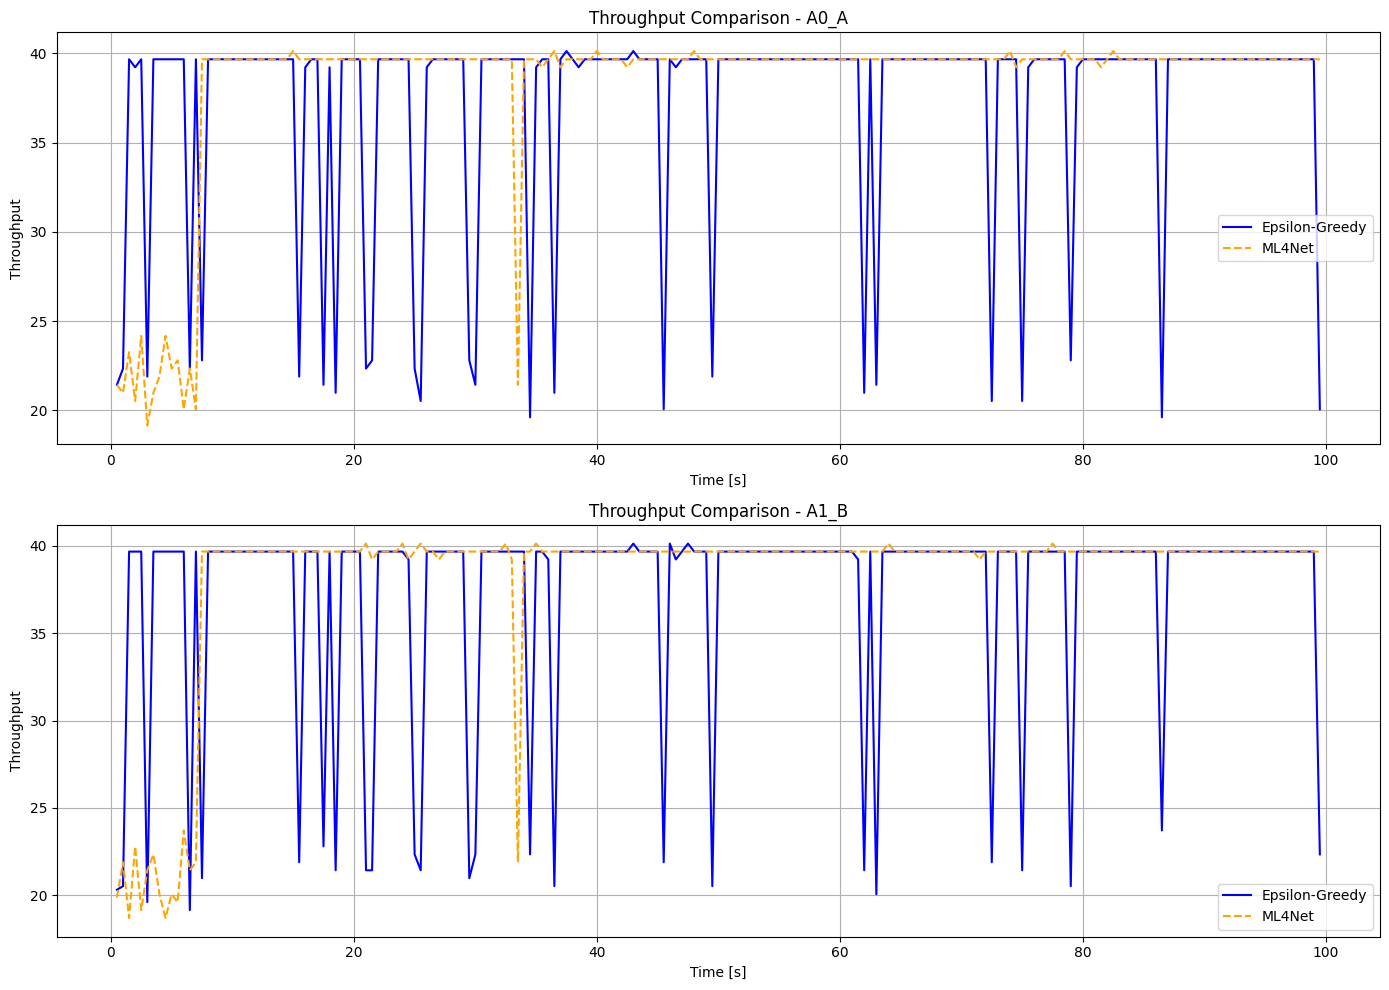

In [ ]:
# Define shared path
ruta_shared_drive = "/content/drive/Shareddrives/aprendizaje_redes"
output = "/labs/lab1/output/"
path = ruta_shared_drive + output

# File names and agent IDs
agents = ["A0_A", "A1_B"]

# Load Epsilon-Greedy logs
egreedy_files = [
    "logs_output_AAX-LAB1-AGENTS-EGREEDY_A0_A.txt",
    "logs_output_AAX-LAB1-AGENTS-EGREEDY_A1_B.txt"
]
time_list_egreedy, throughput_list_egreedy = parse_agent_logs(path, egreedy_files)

# Load ML4Net logs
ml4net_files = [
    "logs_output_AAX-LAB1-AGENTS-ML4NET_A0_A.txt",
    "logs_output_AAX-LAB1-AGENTS-ML4NET_A1_B.txt"
]
time_list_ml4net, throughput_list_ml4net = parse_agent_logs(path, ml4net_files)

# Plot comparison
plot_throughput_comparison(
    time_list_egreedy, throughput_list_egreedy,
    time_list_ml4net, throughput_list_ml4net,
    agents
)


As we see, our method overperformed e-greedy strategy, achieving a higher throughput over iterations, with less down peaks.

### Exercise 6:

Now, modify the "input_nodes.csv" and the input agent files (`agents_egreedy.csv` and `agents_ml4net.csv`) to add a third BSS, which must use the same configuration as the other BSSs but whose AP and STA must be placed at (10,0,0) m and (10,4,0) m, respectively. In the agents file, you will also have to add a third column so that the third BSS gets an agent enrolled.

Run N=5 simulations (using different random seeds) for each action-selection strategy and plot the average throughput obtained by each BSS across the different simulations for each approach.

In [12]:
#Simulation arguments
INPUT_FILE_NODES='../input/input_nodes_ex6.csv'
INPUT_FILE_AGENTS='../input/agents_ex6.csv'
OUTPUT_FILE_LOGS='../output/logs_test_agents.txt'
SIMULATION_CODE='AAX-LAB1-AGENTS'
FLAG_SAVE_NODE_LOGS=0
FLAG_SAVE_AGENT_LOGS=1
FLAG_PRINT_SYSTEM_LOGS=1
FLAG_PRINT_NODE_LOGS=1
FLAG_PRINT_AGENT_LOGS=1
SIM_TIME=100
SEED=1

In [19]:
ruta_shared_drive = "/content/drive/Shareddrives/aprendizaje_redes"
output = "/labs/lab1/output/ex6/"
path = ruta_shared_drive + output
archivos = ["logs_output_AAX-LAB1-AGENTS_A0_A.txt","logs_output_AAX-LAB1-AGENTS_A1_B.txt","logs_output_AAX-LAB1-AGENTS_A2_C.txt"]
agents = ["A0_A","A1_B","A2_C"]
strats = ["strat1","strat2","strat3","strat4"]
sims = ["sim1","sim2","sim3","sim4","sim5"]

Strategy number? 1


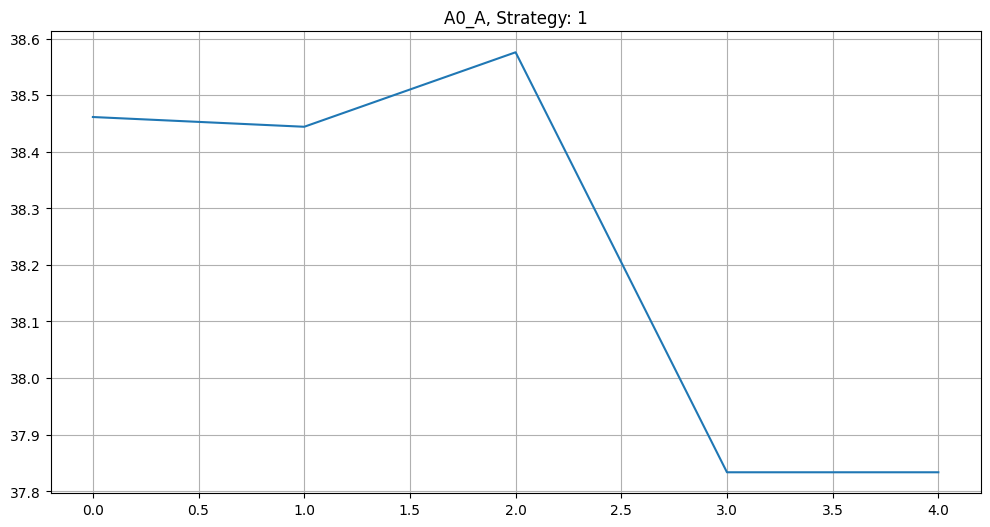

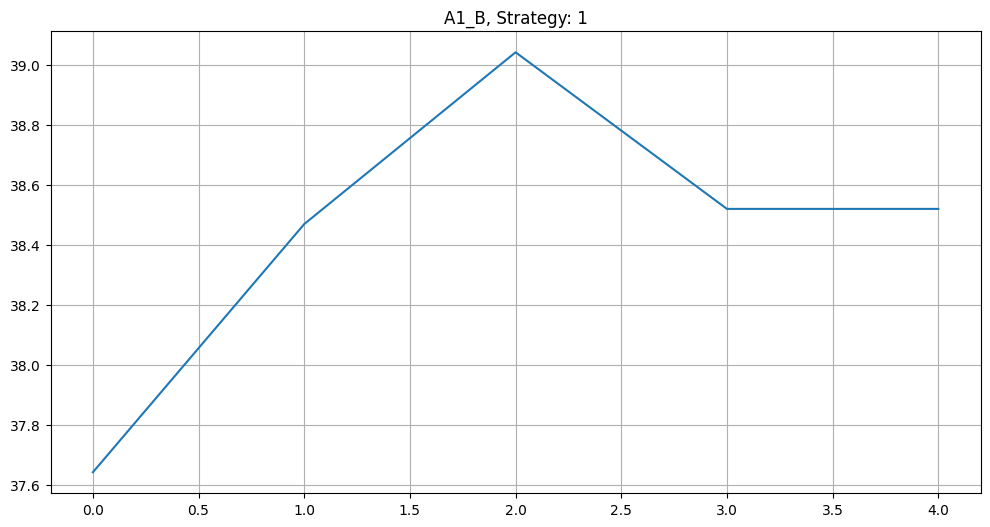

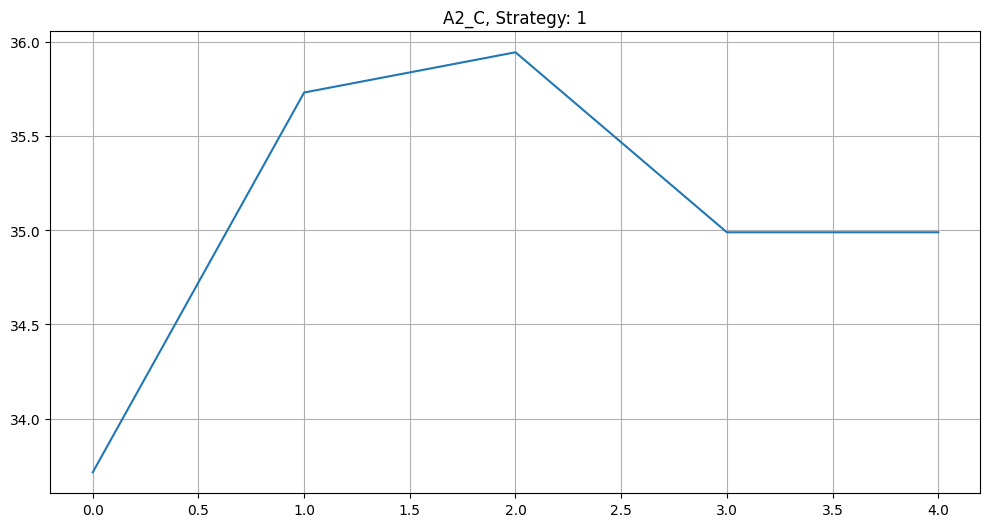

In [20]:
t_list = []

for strat in strats:
  for sim in sims:
     t_list.append(parse_agent_logs(path + strat + '/' + sim + '/', archivos)[1])

n_strat = int(input("Strategy number? "))

for i in range(len(agents)):
  mean_throughput = []
  s = 0
  for j in range(len(strats)):
    for k in range(len(sims)):
      t = t_list[(5*j)+k]
      s = sum(t[i-1])/len(t[i-1])
      mean_throughput.append(s)

  plt.figure(figsize=(12,6))
  plt.plot(mean_throughput[5*(n_strat-1):5*(n_strat)])
  plt.grid(True)
  plt.title(agents[i] + ", Strategy: " + str(n_strat))

plt.show()

In [ ]:
#v!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes_ex6.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_ex6.csv
  - script_output_filename: ../output/logs_test_agents.txt
  - simulation_code: AAX-LAB1-AGENTS
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 1

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMINIS